C:\Users\Shiva\anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1) reached and the optimization hasn't converged yet.
  warnings.warn(


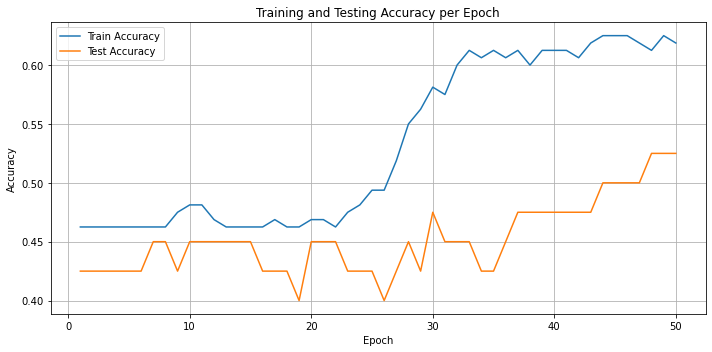

In [66]:
import numpy as np
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Simulate EEG-like features
X = pd.DataFrame({
    'mean_bandpower': np.random.normal(5, 2, 200),
    'spike_count': np.random.randint(0, 10, 200),
    'frequency_variation': np.random.normal(1, 0.3, 200),
})
y = np.random.randint(0, 2, 200)

# Normalize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# MLP model with warm_start to simulate epoch-by-epoch training
model = MLPClassifier(hidden_layer_sizes=(32, 16), max_iter=1, warm_start=True, random_state=42)

epochs = 50
train_acc_list = []
test_acc_list = []

for epoch in range(epochs):
    model.fit(X_train, y_train)
    train_acc_list.append(accuracy_score(y_train, model.predict(X_train)))
    test_acc_list.append(accuracy_score(y_test, model.predict(X_test)))

# Plot accuracy curves
plt.figure(figsize=(10, 5))
plt.plot(range(1, epochs + 1), train_acc_list, label='Train Accuracy')
plt.plot(range(1, epochs + 1), test_acc_list, label='Test Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training and Testing Accuracy per Epoch')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

In [67]:
# Save
joblib.dump(model, "seizure_model.pkl")

['seizure_model.pkl']